In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import xarray as xr
import os
import glob
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
# from statsmodels.distributions.empirical_distribution import ECDF

import seaborn as sns
sns.set_style('white')
sns.set_context("talk") #[poster, paper, talk, notebook]

### example data

In [4]:
def ecdf(data):
    """ Compute ECDF """
    data = data[data>0]
    mu = np.nanmean(data)
    sd = np.nanstd(data)
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

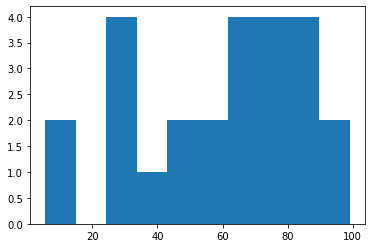

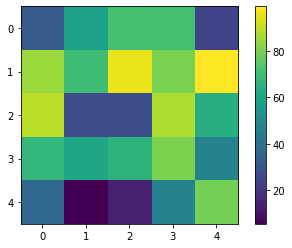

[[31.95640798 58.2712069  71.34978054 71.41869731 24.50084827]
 [85.06509486 69.93972603 96.27067555 80.35841076 99.13885015]
 [89.53965098 27.43215126 27.68786919 87.68697457 64.29245865]
 [67.65495794 61.03310856 66.12005377 80.53433907 47.51630705]
 [36.83292852  5.5370895  13.62007681 47.55623407 79.47034413]]


In [5]:
r = np.random.rand(5,5) * 100

plt.hist(r.flatten()); plt.show()
plt.imshow(r); plt.colorbar(); plt.show()
print(r)

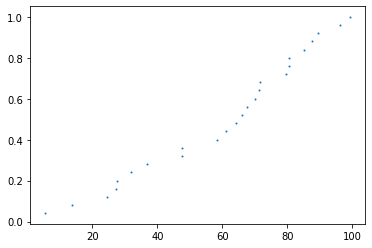

In [78]:
x,y = ecdf(r)
plt.scatter(x=x, y=y, s=1)

In [8]:
print(r.shape)
print(x.shape)

(5, 5)
(25,)


# real data

In [40]:
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow_3km_subregion.nc' #BSU
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds['snow'] = ds.snow.where(ds.snow>=0) #all snow >= zero
ds.x.attrs['long_name']='Easting'; ds.x.attrs['units']='m'
ds.y.attrs['long_name']='Northing'; ds.y.attrs['units']='m'
ds = ds.isel(time=[0,7,18,30,42,49])
ds.close()
ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 1000, y: 1000)
Coordinates:
  * x        (x) float32 279207.0 279210.0 279213.0 ... 282201.0 282204.0
  * y        (y) float32 4221327.0 4221324.0 4221321.0 ... 4218333.0 4218330.0
  * time     (time) datetime64[ns] 2013-04-03 2014-04-07 ... 2018-04-23
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Data variables:
    snow     (time, y, x) float64 dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>

In [41]:
test = ds.snow[0].values
print(np.max(test))
print(test.shape)
print(type(test))

699.0
(1000, 1000)
<class 'numpy.ndarray'>


//anaconda3/envs/data_analysis/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


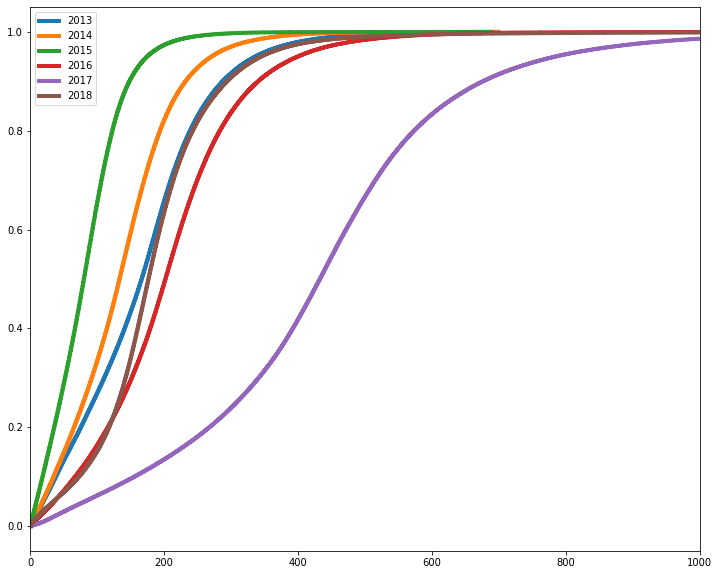

In [75]:
plt.figure(figsize=(12,10))

for layer in range(len(ds.time)):
    d = ds.snow[layer].values #ndarray
    l = ds['time.year'].values[layer]
    x,y = ecdf(d)
#     plt.scatter(x=x, y=y, s=1, label=l)
    plt.plot(x,y,linewidth=4, label=l)
    plt.legend()
    plt.xlim(0,1000)
plt.show()

In [79]:
print(d.shape)
print(x.shape)

(1000, 1000)
(25,)


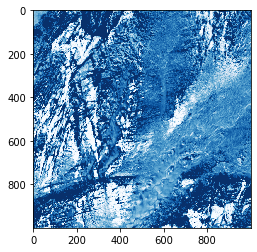

In [24]:
plt.imshow(d, cmap='Blues', vmax=250)